In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [4]:
df_fifa = pd.read_csv('fifa.csv')
df_fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df_fifa_vi = pd.read_csv('fifa_ variable_information.csv')
df_fifa_vi.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [6]:
df_fifa.shape

(18207, 60)

In [7]:
df_fifa_vi.shape

(59, 2)

In [8]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [9]:
df_fifa_vi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [10]:
df_fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [11]:
df_fifa_vi.describe()

,ID,unique id for every player
count,59,59
unique,59,25
top,Name,rating on scale of 100
freq,1,33


In [12]:
df_fifa = df_fifa.drop(columns=['Photo','Flag','Club Logo','Loaned From'])

In [13]:
df_fifa.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [14]:
def clean_val(s):
    x=1
    if pd.isnull(s) == True:
        s=0
        x=0
    else:
        if 'M' in s:
            x=1000000
        elif 'K' in s:
            x=1000
        else:
            x=1
        s=s.replace('M','').replace('K','')

    return(float(s) * x)

In [15]:
df_fifa.fillna({'Value':0}, inplace=True)
df_fifa.fillna({'Wage':0}, inplace=True)
df_fifa.fillna({'Release Clause':0}, inplace=True)

In [16]:
df_fifa['Value']=df_fifa['Value'].str.replace("€","")
df_fifa['Wage']=df_fifa['Wage'].str.replace("€","")
df_fifa['Release Clause']=df_fifa['Release Clause'].str.replace("€","")

In [17]:
df_fifa['Value'] = df_fifa.apply(lambda y: clean_val(y['Value']), axis=1)
df_fifa['Wage'] = df_fifa.apply(lambda y: clean_val(y['Wage']), axis=1)
df_fifa['Release Clause'] = df_fifa.apply(lambda y: clean_val(y['Release Clause']), axis=1)
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [18]:
pd.set_option('display.max_columns', None)

In [19]:
df_fifa.fillna({'Joined':'0000'}, inplace=True)

In [20]:
df_fifa['Joined'] = df_fifa['Joined'].str[-4:].astype(int)
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [21]:
col='Contract Valid Until'
df_fifa[col] = np.where(df_fifa[col].isnull(), np.nan, ('12/31/' + df_fifa[col]))
df_fifa[col] = pd.to_datetime(df_fifa[col], errors='coerce')
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-12-31,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-12-31,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-12-31,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-12-31,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-12-31,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [22]:
df_fifa.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                              float64
Wage                               float64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Jersey Number                      float64
Joined                               int32
Contract Valid Until        datetime64[ns]
Height                              object
Weight                              object
Crossing                           float64
Finishing                          float64
HeadingAccu

In [23]:
df_fifa['Height'] = df_fifa['Height'].str.replace("'",'.').astype(float)
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-12-31,5.70,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-12-31,6.20,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-12-31,5.90,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-12-31,6.40,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-12-31,5.11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [24]:
df_fifa['Weight'] = df_fifa['Weight'].str.rstrip("lbs").astype(float)
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-12-31,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-12-31,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-12-31,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-12-31,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-12-31,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [25]:
missing_val_percent = df_fifa.isnull().sum()*100/len(df_fifa)
print(missing_val_percent)

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        8.529686
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

In [26]:
print(df_fifa.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True))

None


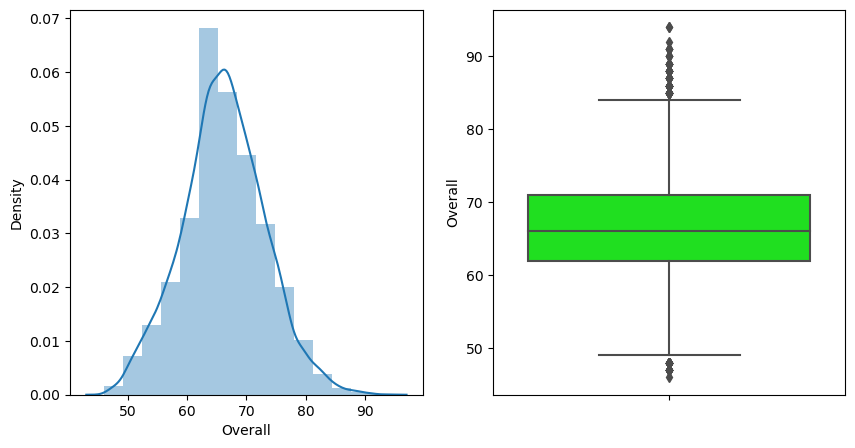

In [27]:
Fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df_fifa['Overall'], bins=15, ax=ax[0])
sns.boxplot(y=df_fifa['Overall'], ax=ax[1], color='lime')
plt.show()

In [28]:
df_overall_sort = df_fifa.copy()
df_overall_sort.sort_values(by='Overall', ascending=False)
print(df_overall_sort[['Name','Overall']].head(20))

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
9            J. Oblak       90
10     R. Lewandowski       90
11           T. Kroos       90
12           D. Godín       90
13        David Silva       90
14           N. Kanté       89
15          P. Dybala       89
16            H. Kane       89
17       A. Griezmann       89
18      M. ter Stegen       89
19        T. Courtois       89


In [29]:
df_fifa_top20=df_overall_sort.head(20)
df_fifa_top20.shape

(20, 56)

In [30]:
df_fifa_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-12-31,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-12-31,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-12-31,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-12-31,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-12-31,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,2012,2020-12-31,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,2012,2020-12-31,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,Normal,RS,9.0,2014,2021-12-31,6.00,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,2005,2020-12-31,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1.0,2014,2021-12-31,6.20,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


In [31]:
avg_age = str(df_fifa_top20['Age'].mean())
avg_wage = str(df_fifa_top20['Wage'].mean())
print('Average Age : ' + avg_age + ' Yrs and Average Wage : €' + avg_wage)

Average Age : 28.3 Yrs and Average Wage : €289700.0


In [32]:
df_fifa_top20.sort_values(by = ['Overall', 'Wage'], axis=0, ascending=[False, False], inplace=False, kind='quicksort', na_position='first', ignore_index=True, key=None)
print(df_fifa_top20[['Name', 'Wage']].head(1))

       Name      Wage
0  L. Messi  565000.0


In [33]:
df_fifa_selected_col=df_fifa[['Name','Club','Wage','Overall']]

In [34]:
df_fifa_selected_col.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


In [35]:
df_fifa_selected_col.groupby('Club')['Overall'].mean()

Club
 SSV Jahn Regensburg     65.760000
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.791667
                           ...    
Zagłębie Sosnowiec       60.625000
Çaykur Rizespor          66.666667
Örebro SK                60.346154
Östersunds FK            63.450000
Śląsk Wrocław            62.208333
Name: Overall, Length: 651, dtype: float64

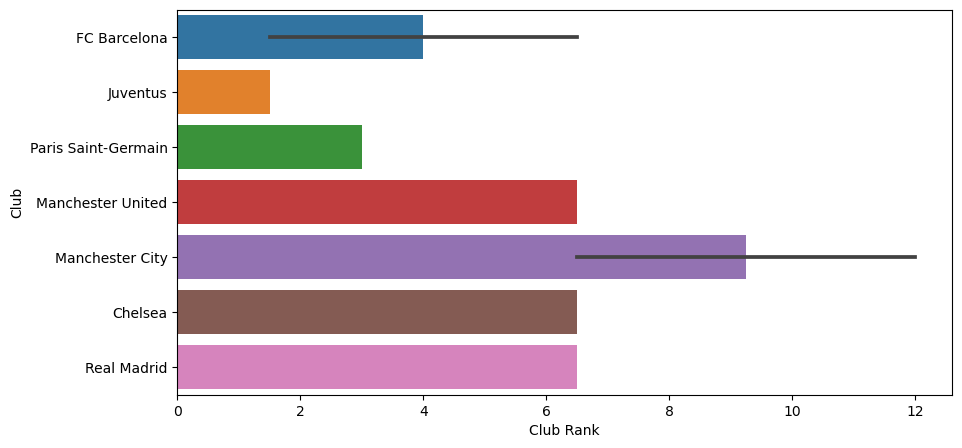

                 Name                 Club      Wage  Overall  Club Rank
0            L. Messi         FC Barcelona  565000.0       94        1.5
1   Cristiano Ronaldo             Juventus  405000.0       94        1.5
2           Neymar Jr  Paris Saint-Germain  290000.0       92        3.0
3              De Gea    Manchester United  260000.0       91        6.5
4        K. De Bruyne      Manchester City  355000.0       91        6.5
5           E. Hazard              Chelsea  340000.0       91        6.5
6           L. Modrić          Real Madrid  420000.0       91        6.5
7           L. Suárez         FC Barcelona  455000.0       91        6.5
8        Sergio Ramos          Real Madrid  380000.0       91        6.5
13        David Silva      Manchester City  285000.0       90       12.0


In [36]:
df_fifa_selected_col['Club Rank']= df_fifa_selected_col['Overall'].rank(method= 'average', ascending= False)
df_top10_clubs= df_fifa_selected_col.sort_values(['Club Rank'], ascending =[True]).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y='Club', x='Club Rank', data= df_top10_clubs)
plt.show()
print(df_top10_clubs)

In [37]:
cor = df_fifa['Age'].corr(df_fifa['Potential'])
print ("Correlation between Age and Potential is ", round(cor,2)) 

Correlation between Age and Potential is  -0.24


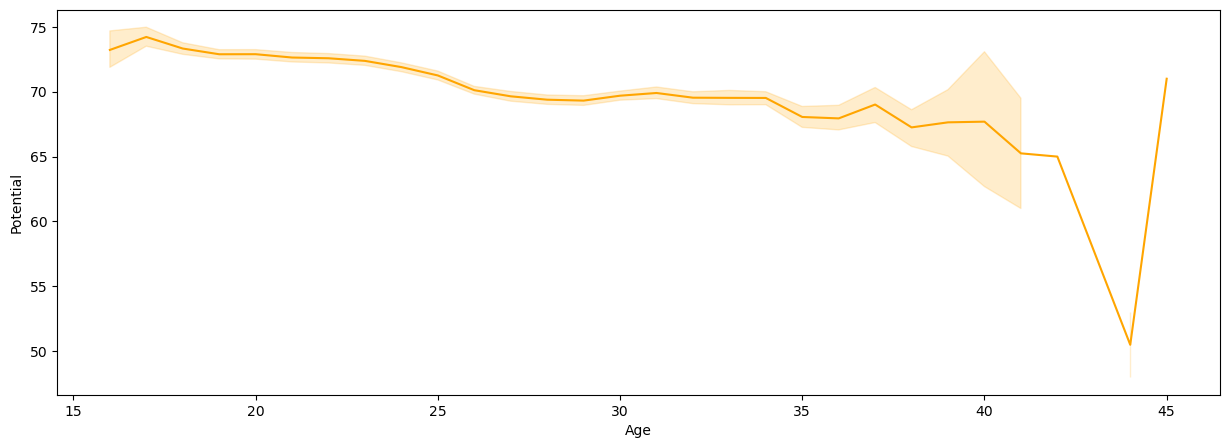

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x= 'Age', y= 'Potential', data = df_fifa, color='orange')
plt.show()

In [39]:
df_wage_rel = df_fifa[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
df_wage_rel.corr()

,Potential,Overall,Value,International Reputation,Release Clause,Wage
Potential,1.000000,0.663802,0.584876,0.385323,0.586260,0.490318
Overall,0.663802,1.000000,0.628907,0.503333,0.616137,0.573730
Value,0.584876,0.628907,1.000000,0.656700,0.994353,0.861520
International Reputation,0.385323,0.503333,0.656700,1.000000,0.640163,0.677072
Release Clause,0.586260,0.616137,0.994353,0.640163,1.000000,0.855915
Wage,0.490318,0.573730,0.861520,0.677072,0.855915,1.000000


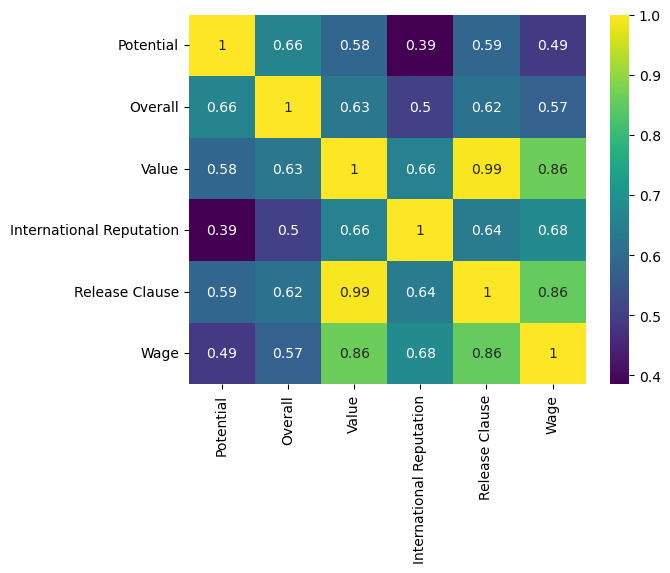

In [40]:
sns.heatmap(df_wage_rel[['Potential','Overall','Value','International Reputation','Release Clause','Wage']].corr(), annot=True, cmap='viridis')
plt.show()

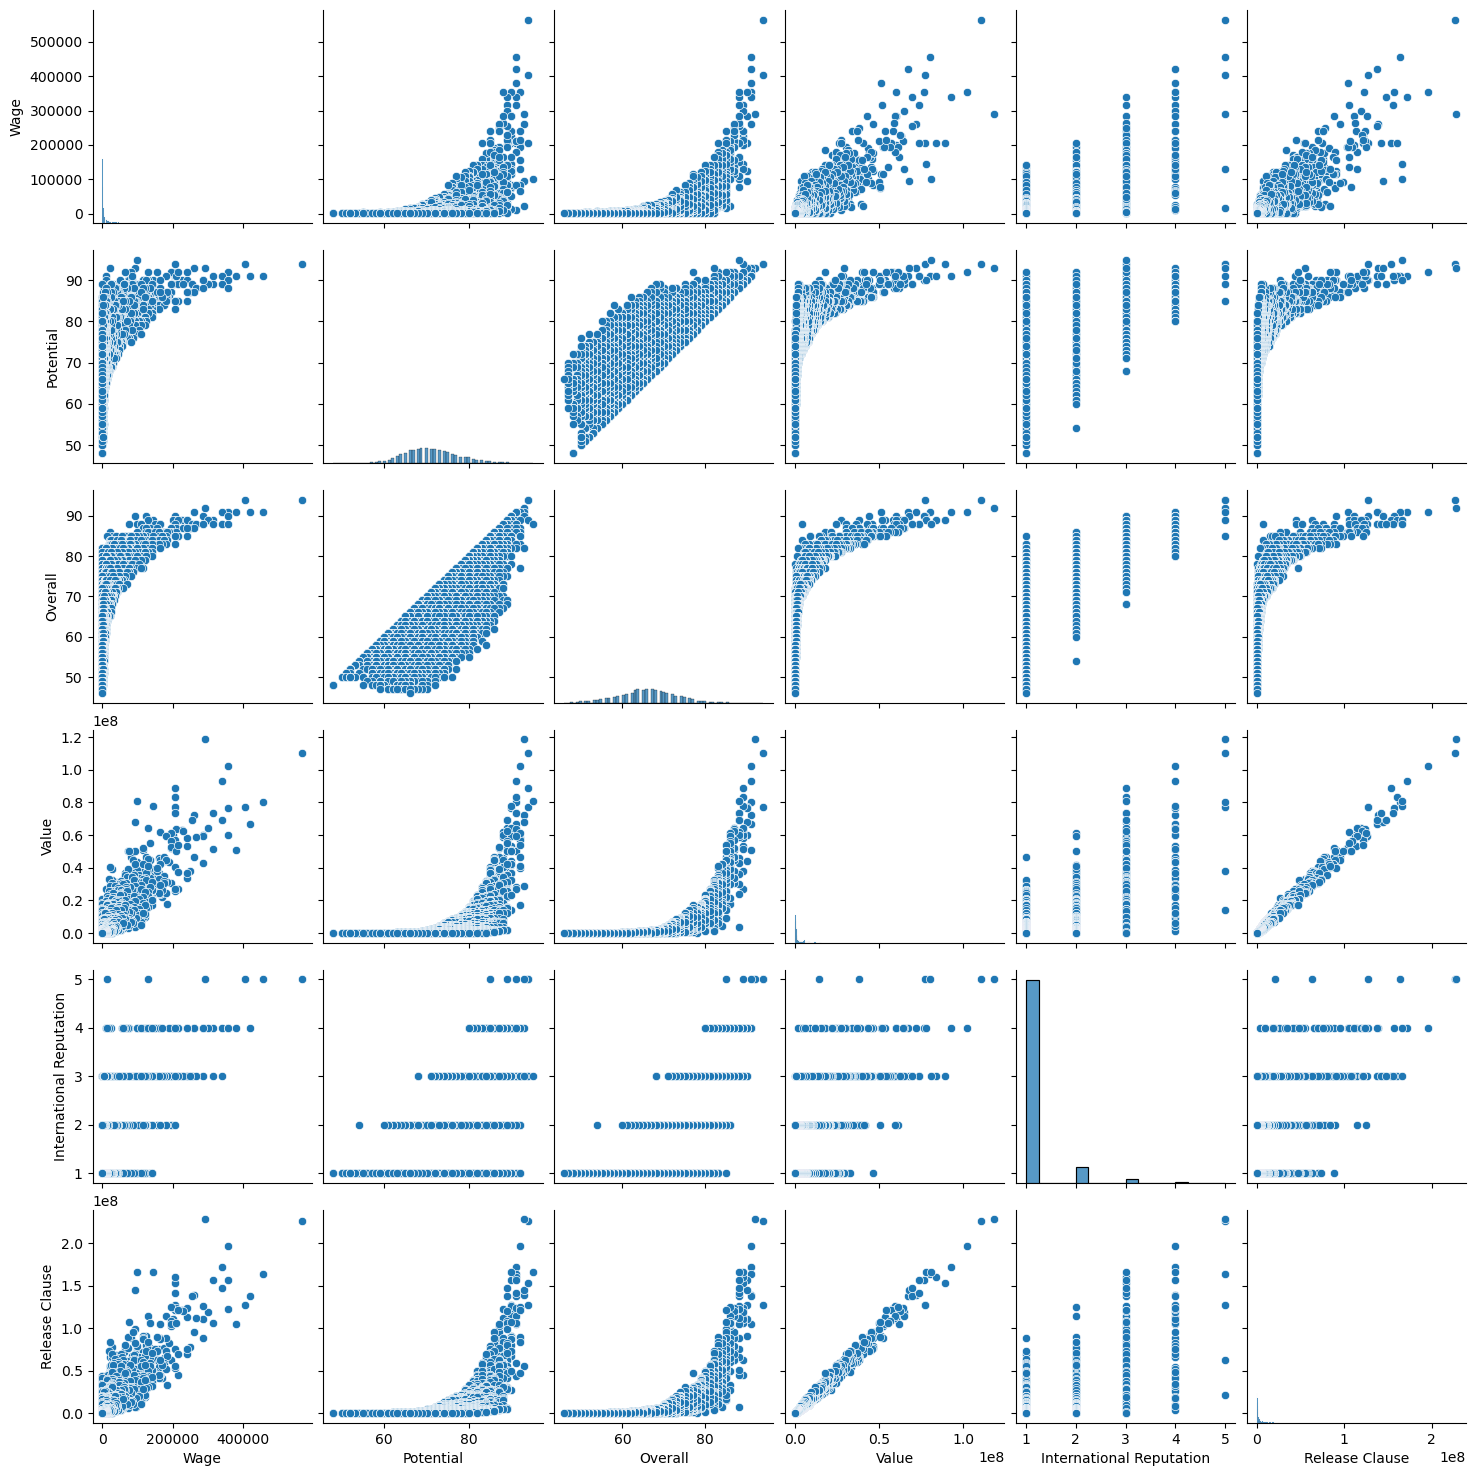

In [41]:
target = df_wage_rel['Wage']
sns.pairplot(df_wage_rel[['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']])
plt.show()

In [42]:
df_pos = df_fifa.groupby(['Position'])['Position'].count().reset_index(name='Count').sort_values(by=('Count'),ascending=False)
print(df_pos)

print("\nMaximum players playing at Position " + df_pos['Position'][df_pos['Count'] == df_pos['Count'].max()].iloc[0])
print( "Minimum players paying at Position " +  df_pos['Position'][df_pos['Count'] == df_pos['Count'].min()].iloc[0])

   Position  Count
26       ST   1924
5        GK   1903
1        CB   1649
4        CM   1276
7        LB   1224
17       RB   1199
22       RM   1022
12       LM   1012
0       CAM    879
2       CDM    873
18      RCB    615
8       LCB    597
19      RCM    355
9       LCM    353
14       LW    338
24       RW    325
20      RDM    228
10      LDM    224
13       LS    184
23       RS    179
25      RWB     84
15      LWB     76
3        CF     66
16      RAM     21
6       LAM     20
11       LF     15
21       RF     13

Maximum players playing at Position ST
Minimum players paying at Position RF


In [43]:
df_pos['Count_Per'] = round(df_pos['Count']*100/df_pos['Count'].max(),1)
df_pos

,Position,Count,Count_Per
26,ST,1924,100.0
5,GK,1903,98.9
1,CB,1649,85.7
4,CM,1276,66.3
7,LB,1224,63.6
17,RB,1199,62.3
22,RM,1022,53.1
12,LM,1012,52.6
0,CAM,879,45.7
2,CDM,873,45.4


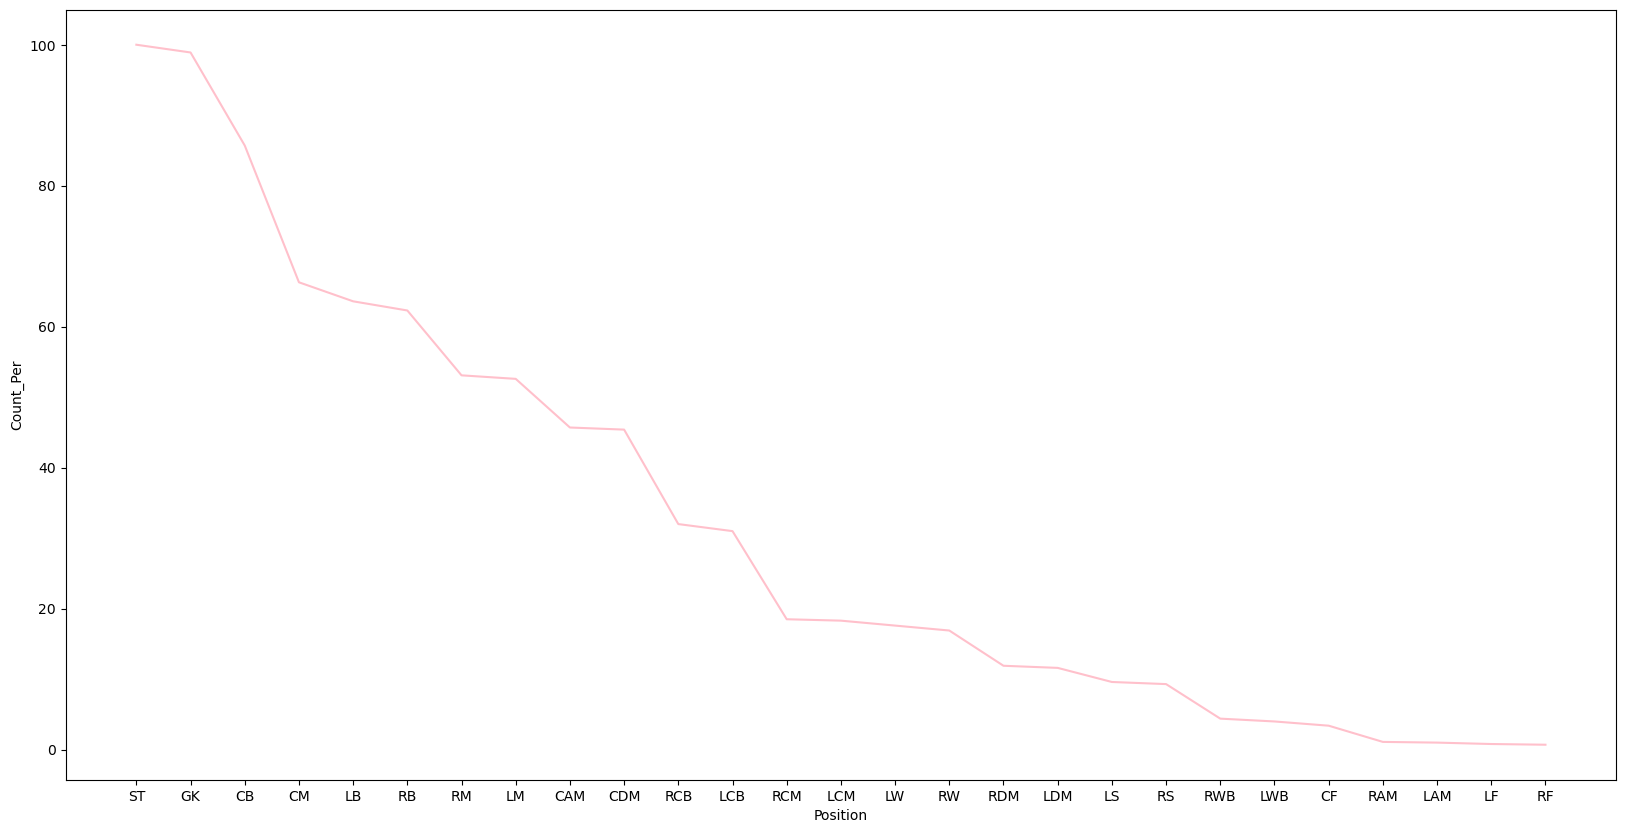

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x= 'Position', y= 'Count_Per', data = df_pos, color='pink')
plt.show()

In [45]:
filter_val = np.where((df_fifa['Club'] == 'Juventus') & (df_fifa['Wage'] > 200000))
df_filter = df_fifa.loc[filter_val]

print(str(df_filter['Club'].count()) + " players in Juventus club has Wages > 200000 ")
display(df_filter)

3 players in Juventus club has Wages > 200000 


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-12-31,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,3.0,4.0,High/ Medium,Normal,LF,21.0,2015,2022-12-31,5.1,165.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,3.0,2005,2020-12-31,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [46]:
df_top5_unique_pos = df_fifa.groupby(by = ['Position']).apply(lambda x: x.sort_values('Overall', ascending = False).head(5))
df_top5_unique_pos.info()
display(df_top5_unique_pos)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 135 entries, ('CAM', 17) to ('ST', 36)
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        135 non-null    int64         
 1   Name                      135 non-null    object        
 2   Age                       135 non-null    int64         
 3   Nationality               135 non-null    object        
 4   Overall                   135 non-null    int64         
 5   Potential                 135 non-null    int64         
 6   Club                      135 non-null    object        
 7   Value                     135 non-null    float64       
 8   Wage                      135 non-null    float64       
 9   Preferred Foot            135 non-null    object        
 10  International Reputation  135 non-null    float64       
 11  Weak Foot                 135 non-null    float64       
 12  Skill

ID               Name  Age Nationality  Overall  Potential  \
Position                                                                      
CAM      17  194765       A. Griezmann   27      France       89         90   
         31  190460         C. Eriksen   26     Denmark       88         91   
         61  201942    Roberto Firmino   26      Brazil       86         87   
         66  189596          T. Müller   28     Germany       86         86   
         74  176635            M. Özil   29     Germany       86         86   
...             ...                ...  ...         ...      ...        ...   
ST       1    20801  Cristiano Ronaldo   33    Portugal       94         94   
         10  188545     R. Lewandowski   29      Poland       90         90   
         16  202126            H. Kane   24     England       89         91   
         23  153079          S. Agüero   30   Argentina       89         89   
         36  173731            G. Bale   28       Wales       88         88   

                          Club       Value      Wage Preferred Foot  \
Position                                                              
CAM      17    Atlético Madrid  78000000.0  145000.0           Left   
         31  Tottenham Hotspur  73500000.0  205000.0          Right   
         61          Liverpool  53000000.0  195000.0          Right   
         66  FC Bayern München  45000000.0  135000.0          Right   
         74            Arsenal  43500000.0  190000.0           Left   
...                        ...         ...       ...            ...   
ST       1            Juventus  77000000.0  405000.0          Right   
         10  FC Bayern München  77000000.0  205000.0          Right   
         16  Tottenham Hotspur  83500000.0  205000.0          Right   
         23    Manchester City  64500000.0  300000.0          Right   
         36        Real Madrid  60000000.0  355000.0           Left   

             International Reputation  Weak Foot  Skill Moves     Work Rate  \
Position                                                                      
CAM      17                       4.0        3.0          4.0    High/ High   
         31                       3.0        5.0          4.0  High/ Medium   
         61                       3.0        4.0          4.0    High/ High   
         66                       4.0        4.0          3.0    High/ High   
         74                       4.0        2.0          4.0   Medium/ Low   
...                               ...        ...          ...           ...   
ST       1                        5.0        4.0          5.0     High/ Low   
         10                       4.0        4.0          4.0  High/ Medium   
         16                       3.0        4.0          3.0    High/ High   
         23                       4.0        4.0          4.0  High/ Medium   
         36                       4.0        3.0          4.0  High/ Medium   

              Body Type Position  Jersey Number  Joined Contract Valid Until  \
Position                                                                       
CAM      17        Lean      CAM            7.0    2014           2023-12-31   
         31        Lean      CAM           10.0    2013           2020-12-31   
         61        Lean      CAM            9.0    2015           2023-12-31   
         66        Lean      CAM           13.0    2008           2021-12-31   
         74        Lean      CAM           10.0    2013           2021-12-31   
...                 ...      ...            ...     ...                  ...   
ST       1   C. Ronaldo       ST            7.0    2018           2022-12-31   
         10      Normal       ST            9.0    2014           2021-12-31   
         16      Normal       ST            9.0    2010           2024-12-31   
         23      Stocky       ST           10.0    2011           2021-12-31   
         36        Lean       ST           11.0    2013           2022-12-31 

In [47]:
avg_wage= df_top5_unique_pos['Wage'].groupby('Position').apply(np.mean)
print(avg_wage)

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     19000.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM     94200.0
LF     121200.0
LM     164600.0
LS      92200.0
LW     261000.0
LWB     30000.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
